# House Price: Advanced regression technique

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from numpy import *
import seaborn as sns
%matplotlib inline
import tensorflow as tf
# sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib notebook

In [5]:
df = pd.read_csv('data/train.csv', sep=',', encoding='UTF-8')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df2 = pd.read_csv('data/test.csv', sep=',', encoding='UTF-8')
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
# df3 = pd.concat([df, df2])
df3 = df.append(df2)
df3.head()
df3.index

C:\Python\Anaconda3-52\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458],
           dtype='int64', length=2919)

In [8]:
df3 = pd.DataFrame(df3, columns=df.columns)
df3.sort_values(['Id'], ascending=True, inplace=True)

In [9]:
df3.reset_index(inplace=True)
df3.set_index(df3['index'])
del df3['index']
df3.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [10]:
df = df3
len(df)

2919

In [32]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'Scree

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [13]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu      1420
GarageType        157
GarageYrBlt       159
GarageFinish      159
GarageCars          1
GarageArea          1
GarageQual        159
GarageCond        159
PavedDrive

In [73]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [74]:
# 기초통계량
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [75]:
df.isnull().any()

Id               False
MSSubClass       False
MSZoning          True
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities         True
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st       True
Exterior2nd       True
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual       True
TotRmsAbvGrd     False
Functional        True
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars        True
GarageArea        True
GarageQual 

C:\Python\Anaconda3-52\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Python\Anaconda3-52\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Python\Anaconda3-52\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

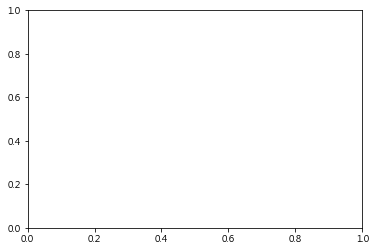

In [14]:
#집값 분포 확인
sns.distplot(df['SalePrice'],kde = False, color = 'b', hist_kws={'alpha':0.9});

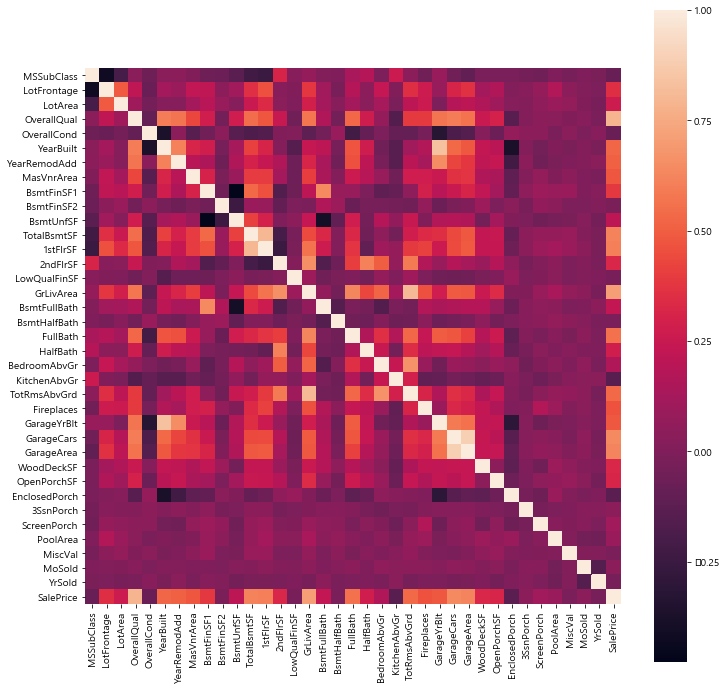

In [79]:
# ID를 제외한 수치형 변수들 간의 상관계수 확인
corr = df.select_dtypes(include = ['float64','int64']).iloc[:,1:].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,vmax=1,square=True);

In [14]:
corr.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.682150,-0.468952,-0.156853,-0.039187,-0.081188,-0.054560,-0.142078,-0.298294,-0.199612,...,-0.163056,-0.116178,0.010317,-0.140172,-0.128932,-0.120944,-0.003922,-0.034707,-0.033821,-0.268209
LotFrontage,-0.682150,1.000000,0.696861,0.458377,-0.269892,0.266324,0.196254,0.444685,0.404159,-0.001474,...,0.267658,0.331089,-0.125950,0.026320,0.049539,0.280274,-0.149234,-0.052115,-0.136644,0.586682
LotArea,-0.468952,0.696861,1.000000,0.204538,-0.112452,0.070685,0.000192,0.248273,0.410450,0.160966,...,0.306394,0.154487,-0.083411,-0.032972,0.065824,0.162956,-0.063306,-0.070780,-0.117656,0.369766
OverallQual,-0.156853,0.458377,0.204538,1.000000,-0.493494,0.840035,0.833815,0.765094,0.380313,-0.295294,...,0.509867,0.608282,-0.493760,-0.045841,-0.023241,-0.008481,-0.275071,0.006037,-0.209533,0.961367
OverallCond,-0.039187,-0.269892,-0.112452,-0.493494,1.000000,-0.648686,-0.344108,-0.476677,-0.233079,0.150669,...,-0.245491,-0.298651,0.330849,0.019959,0.101778,-0.024291,0.177180,-0.022561,0.110065,-0.474182
YearBuilt,-0.081188,0.266324,0.070685,0.840035,-0.648686,1.000000,0.881460,0.649466,0.424626,-0.234811,...,0.506857,0.474354,-0.699778,0.010693,-0.132373,-0.075683,-0.229215,-0.018789,-0.111301,0.784025
YearRemodAdd,-0.054560,0.196254,0.000192,0.833815,-0.344108,0.881460,1.000000,0.531707,0.282874,-0.294470,...,0.464809,0.496147,-0.589472,0.002604,-0.164257,-0.113137,-0.218927,-0.027404,-0.089295,0.757755
MasVnrArea,-0.142078,0.444685,0.248273,0.765094,-0.476677,0.649466,0.531707,1.000000,0.454394,-0.267864,...,0.433670,0.415956,-0.426124,-0.045513,0.026631,-0.022177,-0.244522,-0.062631,-0.162052,0.801564
BsmtFinSF1,-0.298294,0.404159,0.410450,0.380313,-0.233079,0.424626,0.282874,0.454394,1.000000,0.051033,...,0.435215,0.206748,-0.320510,-0.000563,0.063666,0.188581,-0.131083,-0.099897,-0.030009,0.509466
BsmtFinSF2,-0.199612,-0.001474,0.160966,-0.295294,0.150669,-0.234811,-0.294470,-0.267864,0.051033,1.000000,...,-0.004225,-0.176580,0.119855,-0.088680,0.143261,0.059524,0.003501,-0.083686,0.066816,-0.224561


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 69 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

In [17]:
# nan 값이 얼마나 있는지 column별로 확인하기
df.isnull().sum()

# 전체 data 개수 대비 NaN의 비율
df.isnull().sum() / len(df)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
                   ...   
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
Fireplaces       0.000000
FireplaceQu      0.472603
GarageType  

In [65]:
#NaN값이 너무 많거나 상관이 없는 열 삭제(12개)
df.drop('Alley', axis=1, inplace=True)
df.drop('PoolQC', axis=1, inplace=True)
df.drop('MiscFeature', axis=1, inplace=True)
df.drop('Fence', axis=1, inplace=True)
df.drop('PoolArea', axis=1, inplace=True)
df.drop('3SsnPorch', axis=1, inplace=True)
df.drop('YrSold', axis=1, inplace=True)
df.drop('MoSold', axis=1, inplace=True)
df.drop('LowQualFinSF', axis=1, inplace=True)
df.drop('MiscVal', axis=1, inplace=True)
df.drop('BsmtHalfBath', axis=1, inplace=True)
df.drop('BsmtFinSF2', axis=1, inplace=True)


KeyError: "['Alley'] not found in axis"

In [56]:
cols_numerical = []
cols_nonNumerical = []
for col in df:
    if col in ['MSSubClass', 'OverallQual', 'OverallCond']:
        cols_nonNumerical.append(col)
    elif df[col].dtype == 'int64' or df[col].dtype == 'float64':
        cols_numerical.append(col)
    else:
        cols_nonNumerical.append(col)


In [57]:
df[cols_numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 27 columns):
Id               2919 non-null int64
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
MasVnrArea       2919 non-null float64
BsmtFinSF1       2919 non-null float64
BsmtUnfSF        2919 non-null float64
TotalBsmtSF      2919 non-null float64
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
GrLivArea        2919 non-null int64
BsmtFullBath     2919 non-null float64
FullBath         2919 non-null int64
HalfBath         2919 non-null int64
BedroomAbvGr     2919 non-null int64
KitchenAbvGr     2919 non-null int64
TotRmsAbvGrd     2919 non-null int64
Fireplaces       2919 non-null int64
GarageYrBlt      2919 non-null float64
GarageCars       2919 non-null float64
GarageArea       2919 non-null float64
WoodDeckSF       2919 non-null int64
OpenPorchSF      2919 no

In [58]:
df[cols_nonNumerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 42 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 non-null object
ExterQual        2919 non-null object
ExterCond        2919 non-null object
Foundation       2919 non-null object
BsmtQual         2919 

In [93]:
cols_numerical = cols_numerical[1:-1]
cols_ordinal = ['MSSubClass', 'Street','LotShape','Utilities','LandSlope','OverallQual',
                'OverallCond','KitchenQual', 'FireplaceQu',
                'HeatingQC','PavedDrive','ExterQual', 'ExterCond',
               'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                'BsmtFinType2', 'GarageFinish','GarageQual','GarageCond'
                ]
cols_categorical = ['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
                    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                    'Foundation', 'Heating','CentralAir',
                    'Electrical', 'SaleType', 'SaleCondition','GarageType', 'Functional']

In [95]:
len(cols_numerical), len(cols_categorical), len(cols_ordinal) 

(23, 21, 21)

In [96]:
# numerical의 NA값은 모두 0으로 대치
df[cols_numerical] = df[cols_numerical].fillna(0)
# categorical은 결측치를 하나의 unique값으로 보고 0에 대응시킴
df[cols_categorical] = df[cols_categorical].fillna(0)
# ordinal은 data description에 따라 NA = 0인 경우 0 처리
df[cols_ordinal[:12]] = df[cols_ordinal[:12]].fillna(0)
# 설명이 없을 경우 0.5로 처리
df[cols_ordinal[12:]] = df[cols_ordinal[12:]].fillna(0.5)

In [97]:
df[cols_numerical].info()
df[cols_categorical].info()
df[cols_ordinal].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 23 columns):
LotArea          2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
MasVnrArea       2919 non-null float64
BsmtFinSF1       2919 non-null float64
BsmtUnfSF        2919 non-null float64
TotalBsmtSF      2919 non-null float64
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
GrLivArea        2919 non-null int64
BsmtFullBath     2919 non-null float64
FullBath         2919 non-null int64
HalfBath         2919 non-null int64
BedroomAbvGr     2919 non-null int64
KitchenAbvGr     2919 non-null int64
TotRmsAbvGrd     2919 non-null int64
Fireplaces       2919 non-null int64
GarageYrBlt      2919 non-null float64
GarageCars       2919 non-null float64
GarageArea       2919 non-null float64
WoodDeckSF       2919 non-null int64
OpenPorchSF      2919 non-null int64
EnclosedPorch    2919 non-null int64
dtypes: float64(8), int64(

In [68]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
                 ... 
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
BsmtFullBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQ

In [98]:
# 카테고리형
for col in df[cols_categorical]:
    val = 1
    temp_dict = {}
    for unique in df[col].unique():
        if unique != 0:
            temp_dict[unique] = val
            df[col][df[col] == unique] = val
            val += 1
    print(temp_dict)
# df2.loc[:,['Foundation','Heating', 'CentralAir', 'Electrical']]

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


{1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
{1: 1, 2: 2, 3: 3, 4: 4}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16}
{1: 1, 2: 2, 3: 3, 4: 4}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
{1: 1, 2: 2}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
{1: 1, 2: 2

In [99]:
for col in cols_ordinal:
    print(df[col].unique(), col)

[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150] MSSubClass
[0.75 0.25] Street
[0.875 0.625 0.375 0.125] LotShape
[0.75 0.25 0.  ] Utilities
[0.83333333 0.5        0.16666667] LandSlope
[0.65 0.55 0.75 0.45 0.85 0.35 0.95 0.25 0.05 0.15] OverallQual
[0.45 0.75 0.55 0.65 0.35 0.15 0.25 0.85 0.05] OverallCond
[0.7 0.5 0.9 0.3 0. ] KitchenQual
[0.  0.5 0.7 0.3 0.9 0.1] FireplaceQu
[0.9 0.7 0.5 0.3 0.1] HeatingQC
[0.83333333 0.16666667 0.5       ] PavedDrive
[0.7 0.5 0.9 0.3] ExterQual
[0.5 0.7 0.3 0.1 0.9] ExterCond
[0.7 0.5 0.9 0.3] BsmtQual
[0.5 0.7 0.3 0.1] BsmtCond
[0.9 0.7 0.5 0.3] BsmtExposure
[0.92857143 0.78571429 0.64285714 0.5        0.35714286 0.21428571] BsmtFinType1
[0.21428571 0.64285714 0.5        0.78571429 0.35714286 0.92857143] BsmtFinType2
[0.625 0.375 0.875 0.5  ] GarageFinish
[ 0.   -0.04  0.04  0.08 -0.08] GarageQual
[0.5 0.3 0.7 0.1 0.9] GarageCond


In [26]:
# df_temp = df[['Street','LotShape','Utilities','LandSlope','OverallQual',
#                 'OverallCond','KitchenQual', 'FireplaceQu',
#                 'HeatingQC','PavedDrive','ExterQual', 'ExterCond',
#                 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#                 'BsmtFinType2', 'GarageFinish','GarageQual','GarageCond']]

In [27]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [73]:
df['Street'][df['Street']=='Pave'] = (2 - 1/2) /2
df['Street'][df['Street']=='Grvl'] = (1 - 1/2) /2

df['Street'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([0.75, 0.25], dtype=object)

In [74]:
df['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [75]:
df['LotShape'][df['LotShape']=='Reg'] = (4 - 1/2) /4
df['LotShape'][df['LotShape']=='IR1'] = (3 - 1/2) /4
df['LotShape'][df['LotShape']=='IR2'] = (2 - 1/2) /4
df['LotShape'][df['LotShape']=='IR3'] = (1 - 1/2) /4

df['LotShape'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3-52\li

array([0.875, 0.625, 0.375, 0.125], dtype=object)

In [76]:
df['OverallQual'].unique()
#,'OverallQual','OverallCond','KitchenQual', 'FireplaceQu',
#     'HeatingQC','PavedDrive','ExterQual', 'ExterCond',
#     'Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#     'BsmtFinType2', 'GarageFinish','GarageQual','GarageCond',
#     'PoolQC', 'Fence'

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [77]:
df['Utilities'][df['Utilities']=='AllPub'] = (2 - 1/2) /2
df['Utilities'][df['Utilities']=='NoSeWa'] = (1 - 1/2) /2

df['LandSlope'][df['LandSlope']=='Gtl'] = (3 - 1/2) /3
df['LandSlope'][df['LandSlope']=='Mod'] = (2 - 1/2) /3
df['LandSlope'][df['LandSlope']=='Sev'] = (1 - 1/2) /3

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:5: S

In [78]:
df['Utilities'].unique()

array([0.75, 0.25, 0], dtype=object)

In [79]:
df['LandSlope'].unique()

array([0.8333333333333334, 0.5, 0.16666666666666666], dtype=object)

In [80]:
df['OverallQual'][df['OverallQual']==10] = (10 - 1/2) /10
df['OverallQual'][df['OverallQual']==9] = (9 - 1/2) /10
df['OverallQual'][df['OverallQual']==8] = (8 - 1/2) /10
df['OverallQual'][df['OverallQual']==7] = (7 - 1/2) /10
df['OverallQual'][df['OverallQual']==6] = (6 - 1/2) /10
df['OverallQual'][df['OverallQual']==5] = (5 - 1/2) /10
df['OverallQual'][df['OverallQual']==4] = (4 - 1/2) /10
df['OverallQual'][df['OverallQual']==3] = (3 - 1/2) /10
df['OverallQual'][df['OverallQual']==2] = (2 - 1/2) /10
df['OverallQual'][df['OverallQual']==1] = (1 - 1/2) /10

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
df['OverallQual'].unique()

array([0.65, 0.55, 0.75, 0.45, 0.85, 0.35, 0.95, 0.25, 0.05, 0.15])

In [82]:
df['OverallCond'][df['OverallCond']==10] = (10 - 1/2) /10
df['OverallCond'][df['OverallCond']==9] = (9 - 1/2) /10
df['OverallCond'][df['OverallCond']==8] = (8 - 1/2) /10
df['OverallCond'][df['OverallCond']==7] = (7 - 1/2) /10
df['OverallCond'][df['OverallCond']==6] = (6 - 1/2) /10
df['OverallCond'][df['OverallCond']==5] = (5 - 1/2) /10
df['OverallCond'][df['OverallCond']==4] = (4 - 1/2) /10
df['OverallCond'][df['OverallCond']==3] = (3 - 1/2) /10
df['OverallCond'][df['OverallCond']==2] = (2 - 1/2) /10
df['OverallCond'][df['OverallCond']==1] = (1 - 1/2) /10

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [83]:
# 서수형
df_temp = df[['KitchenQual', 'FireplaceQu',
                'HeatingQC','PavedDrive','ExterQual', 'ExterCond',
               'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                'BsmtFinType2', 'GarageFinish','GarageQual','GarageCond']]
for col in df_temp:    
    df[col][df[col] == 'Ex'] = (5 - 1/2) / 5
    df[col][df[col] == 'Gd'] = (4 - 1/2) / 5
    df[col][df[col] == 'TA'] = (3 - 1/2) / 5
    df[col][df[col] == 'Fa'] = (2 - 1/2) / 5
    df[col][df[col] == 'Po'] = (1 - 1/2) / 5
    print(df[col].unique())

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be

[0.7 0.5 0.9 0.3 0]
[0 0.5 0.7 0.3 0.9 0.1]
[0.9 0.7 0.5 0.3 0.1]
['Y' 'N' 'P']
[0.7 0.5 0.9 0.3]
[0.5 0.7 0.3 0.1 0.9]
[0.7 0.5 0.9 0.3]
[0.5 0.7 0.3 0.1]
['No' 0.7 'Mn' 'Av' 0.5]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 0.5 'LwQ']
['Unf' 'BLQ' 0.5 'ALQ' 'Rec' 'LwQ' 'GLQ']
['RFn' 'Unf' 'Fin' 0.5]
[0.5 0.3 0.7 0.9 0.1]
[0.5 0.3 0.7 0.1 0.9]


In [84]:
df['PavedDrive'][df['PavedDrive']=='Y'] = (3 - 1/2) /3
df['PavedDrive'][df['PavedDrive']=='P'] = (2 - 1/2) /3
df['PavedDrive'][df['PavedDrive']=='N'] = (1 - 1/2) /3
df['PavedDrive'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.8333333333333334, 0.16666666666666666, 0.5], dtype=object)

In [85]:
df['BsmtExposure'][df['BsmtExposure']=='No'] = (5 - 1/2) /5
df['BsmtExposure'][df['BsmtExposure']== 0.7] = (4 - 1/2) /5
df['BsmtExposure'][df['BsmtExposure']=='Mn'] = (3 - 1/2) /5
df['BsmtExposure'][df['BsmtExposure']=='Av'] = (2 - 1/2) /5
df['BsmtExposure'][df['BsmtExposure']== 0] = (1 - 1/2) /5
df['BsmtExposure'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3-52\li

array([0.9, 0.7, 0.5, 0.3], dtype=object)

In [86]:
df['BsmtFinType1'][df['BsmtFinType1']=='GLQ'] = (7 - 1/2) /7
df['BsmtFinType1'][df['BsmtFinType1']== 'ALQ'] = (6 - 1/2) /7
df['BsmtFinType1'][df['BsmtFinType1']=='Unf'] = (5 - 1/2) /7
df['BsmtFinType1'][df['BsmtFinType1']=='Rec'] = (4 - 1/2) /7
df['BsmtFinType1'][df['BsmtFinType1']== 'BLQ'] = (3 - 1/2) /7
df['BsmtFinType1'][df['BsmtFinType1']== 'LwQ'] = (2 - 1/2) /7
df['BsmtFinType1'][df['BsmtFinType1']== 0] = (1 - 1/2) /7

df['BsmtFinType1'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3-52\li

array([0.9285714285714286, 0.7857142857142857, 0.6428571428571429, 0.5,
       0.35714285714285715, 0.21428571428571427], dtype=object)

In [87]:
df['BsmtFinType2'][df['BsmtFinType2']=='GLQ'] = (7 - 1/2) /7
df['BsmtFinType2'][df['BsmtFinType2']== 'ALQ'] = (6 - 1/2) /7
df['BsmtFinType2'][df['BsmtFinType2']=='BLQ'] = (5 - 1/2) /7
df['BsmtFinType2'][df['BsmtFinType2']=='Rec'] = (4 - 1/2) /7
df['BsmtFinType2'][df['BsmtFinType2']== 'LwQ'] = (3 - 1/2) /7
df['BsmtFinType2'][df['BsmtFinType2']== 'Unf'] = (2 - 1/2) /7
df['BsmtFinType2'][df['BsmtFinType2']== 0] = (1 - 1/2) /7

df['BsmtFinType2'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3-52\li

array([0.21428571428571427, 0.6428571428571429, 0.5, 0.7857142857142857,
       0.35714285714285715, 0.9285714285714286], dtype=object)

In [88]:
df['GarageFinish'][df['GarageFinish']=='Fin'] = (4 - 1/2) /4
df['GarageFinish'][df['GarageFinish']=='RFn'] = (3 - 1/2) /4
df['GarageFinish'][df['GarageFinish']=='Unf'] = (2 - 1/2) /4
df['GarageFinish'][df['GarageFinish']==0] = (1 - 1/2) /4

df['GarageFinish'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3-52\li

array([0.625, 0.375, 0.875, 0.5], dtype=object)

In [89]:
df['GarageQual'].unique()

array([0.5, 0.3, 0.7, 0.9, 0.1], dtype=object)

In [90]:
df['GarageQual'] = (df['GarageQual']-1/2)/5

In [91]:
df['GarageQual'][df['GarageQual']== -0.1] = 0
df['GarageQual'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([0.0, -0.04, 0.039999999999999994, 0.08, -0.08], dtype=object)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 69 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null int64
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null float64
LotShape         2919 non-null float64
LandContour      2919 non-null int64
Utilities        2919 non-null float64
LotConfig        2919 non-null int64
LandSlope        2919 non-null float64
Neighborhood     2919 non-null int64
Condition1       2919 non-null int64
Condition2       2919 non-null int64
BldgType         2919 non-null int64
HouseStyle       2919 non-null int64
OverallQual      2919 non-null float64
OverallCond      2919 non-null float64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null int64
RoofMatl         2919 non-null int64
Exterior1st      2919 non-null int64
Exterior2nd      2919 non-nu

In [101]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
                 ... 
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
BsmtFullBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQ

## 표준화
정확히는 Standardization: (요소값 - 평균)/표준편차 <p>
Normalization: (요소값 - 최소값)/(최대값 - 최소값)


In [102]:
cols_numerical

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch']

In [103]:
# 수치형 데이터
for col in cols_numerical:
    df[col] = (df[col] - df[col].mean()) / df[col].std()
    
df[cols_numerical].head(10)

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,-0.217841,1.046078,0.896679,0.528944,0.581046,-0.934005,-0.443002,-0.773728,1.207172,0.413476,...,0.169898,-0.207663,0.986680,-0.924153,0.294952,0.306987,0.349304,-0.740634,0.199972,-0.359539
1,-0.072032,0.154737,-0.395536,-0.566919,1.178053,-0.629176,0.477381,0.261030,-0.784891,-0.471810,...,0.169898,-0.207663,-0.287709,0.623525,0.234910,0.306987,-0.058981,1.614603,-0.702722,-0.359539
2,0.137173,0.980053,0.848819,0.338845,0.098173,-0.287950,-0.297917,-0.610614,1.235163,0.563659,...,0.169898,-0.207663,-0.287709,0.623525,0.290504,0.306987,0.627680,-0.740634,-0.081195,-0.359539
3,-0.078371,-1.859033,-0.682695,-0.566919,-0.494445,-0.046816,-0.669697,-0.506118,0.978574,0.427309,...,0.169898,-0.207663,0.349486,0.623525,0.283833,1.618986,0.785426,-0.740634,-0.184783,3.874303
4,0.518814,0.947040,0.753100,1.389978,0.469107,-0.160558,0.212148,-0.037164,1.671364,1.377806,...,1.385418,-0.207663,1.623875,0.623525,0.288281,1.618986,1.685509,0.776834,0.540332,-0.359539
5,0.500430,0.715952,0.513801,-0.566919,0.638113,-1.129641,-0.579019,-0.926648,0.535376,-0.274201,...,-2.261142,-0.207663,-0.924904,-0.924153,0.272714,0.306987,0.033811,-0.424494,-0.258774,-0.359539
6,-0.010665,1.079091,0.992399,0.473032,2.036251,-0.554106,1.438570,1.362054,-0.784891,0.381859,...,0.169898,-0.207663,0.349486,0.623525,0.297176,0.306987,0.757589,1.274753,0.140779,-0.359539
7,0.027119,0.055700,-0.539116,0.774953,0.916862,-0.783865,0.126004,-0.134013,1.508080,1.164389,...,0.169898,-0.207663,0.349486,2.171203,0.228239,0.306987,0.052369,1.116684,2.316124,3.189417
8,-0.513264,-1.330831,-1.639892,-0.566919,-0.968539,0.890419,-0.225374,-0.350650,0.969244,0.539946,...,-1.045622,4.455168,0.986680,2.171203,0.134840,0.306987,-0.021864,-0.029321,-0.702722,2.831408
9,-0.348436,-1.066730,-1.639892,-0.566919,0.899303,-0.956753,-0.136963,-0.210473,-0.784891,-0.837386,...,-1.045622,4.455168,-0.924904,2.171203,0.152630,-1.005012,-1.242080,-0.740634,-0.643529,-0.359539


In [104]:
# SalePrice를 1/10000으로 줄임
df.iloc[:,-1:] = df.iloc[:, -1:]/10000

In [105]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,1,60,1,65.0,-0.217841,0.75,0.875,1,0.75,1,...,0.0,0.5,0.833333,-0.740634,0.199972,-0.359539,0,1,1,20.85
1,2,20,1,80.0,-0.072032,0.75,0.875,1,0.75,2,...,0.0,0.5,0.833333,1.614603,-0.702722,-0.359539,0,1,1,18.15
2,3,60,1,68.0,0.137173,0.75,0.625,1,0.75,1,...,0.0,0.5,0.833333,-0.740634,-0.081195,-0.359539,0,1,1,22.35
3,4,70,1,60.0,-0.078371,0.75,0.625,1,0.75,3,...,0.0,0.5,0.833333,-0.740634,-0.184783,3.874303,0,1,2,14.00
4,5,60,1,84.0,0.518814,0.75,0.625,1,0.75,2,...,0.0,0.5,0.833333,0.776834,0.540332,-0.359539,0,1,1,25.00


In [107]:
df[:1460].to_csv('./data/HousePrice_preprocessed_train_v1.csv', index=False, sep=',', encoding='UTF-8')
df[1460:].to_csv('./data/HousePrice_preprocessed_test_v1.csv', index=False, sep=',', encoding='UTF-8')